In [1]:
import pandas as pd
import datetime as dt
import openpyxl
import math
import matplotlib.pyplot as plt
from typing import NamedTuple

eit_spf_df = pd.read_excel('Q_SPF_AUG_EIT_2.xlsx', sheet_name='Sheet1')
eit_spf_df['OPERATION_DATE'] = pd.to_datetime(eit_spf_df['OPERATION_DATE'])
eit_spf_df

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
0,FFAU3935495,I,40,F,CNTR,2023-08-10 22:08:44-07:00,34AV3A,1C,RS07,LIN
1,FFAU1474959,I,40,F,CNTR,2023-08-10 23:08:04-07:00,26AA6R,1A,TR13,TRA
2,FFAU2482183,I,40,F,CNTR,2023-08-10 23:08:05-07:00,509EZ1,1C,RS07,LIN
3,FFAU3482887,I,40,F,CNTR,2023-08-10 23:08:07-07:00,893AJ4,1A,TR13,TRA
4,TGBU9302270,I,40,F,CNTR,2023-08-10 23:08:10-07:00,102EY3,1C,RS07,LIN
...,...,...,...,...,...,...,...,...,...,...
10093,TRHU7787983,I,40,F,CNTR,2023-08-31 22:08:42-07:00,44AL9S,1C,RS06,LIN
10094,WHSU5203305,I,40,F,CNTR,2023-08-31 22:08:43-07:00,35AE1E,1A,TRS7,TRA
10095,TRHU4345627,I,40,F,CNTR,2023-08-31 22:08:47-07:00,78BA3R,1C,RS07,LIN
10096,FFAU3881465,I,40,F,CNTR,2023-08-31 22:08:55-07:00,67AK7X,1C,RS06,LIN


-------------------------------------------
- Pattern: Empty_20ft_Expo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 0.5108, Relative Std: 5.1075%
Mixed Trucks Diff to Ground Truth Std: 0.55, Relative Std: 5.5003%
Ground Truth Total: 10
Single Trucks Total: 10
Mixed Trucks Total: 9


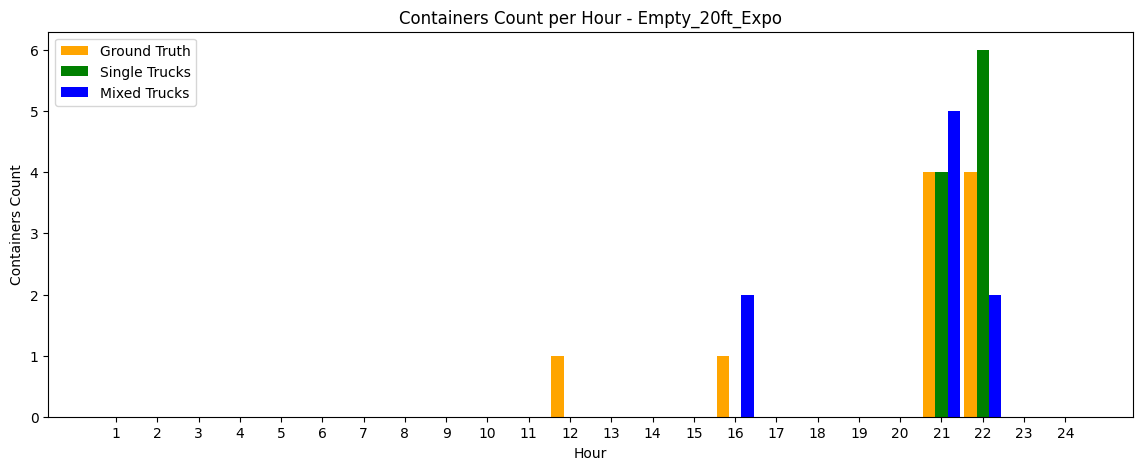

-------------------------------------------
- Pattern: Laden_20ft_Expo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 1.7693, Relative Std: 2.328%
Mixed Trucks Diff to Ground Truth Std: 1.9542, Relative Std: 2.5713%
Ground Truth Total: 76
Single Trucks Total: 76
Mixed Trucks Total: 78


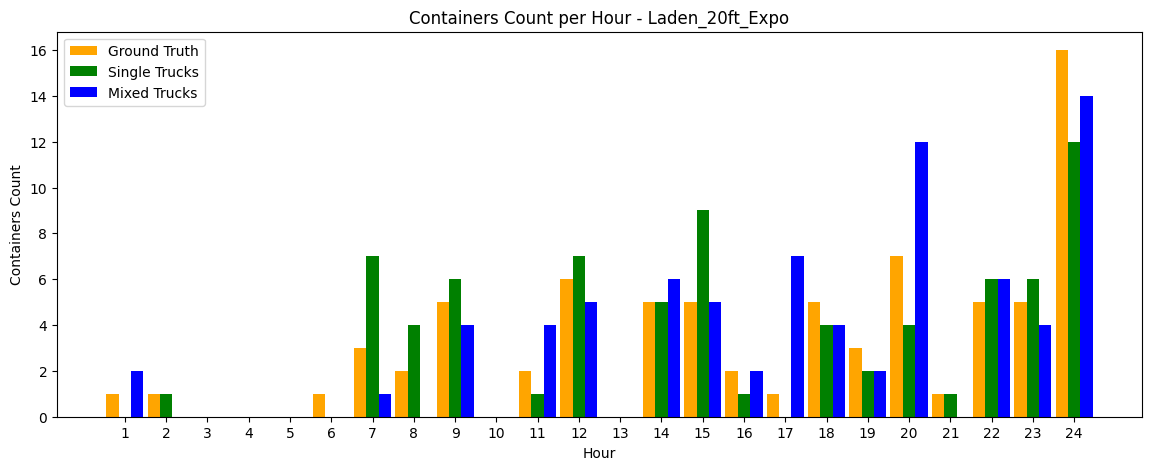

-------------------------------------------
- Pattern: Empty_40ft_Expo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 1.7693, Relative Std: 2.722%
Mixed Trucks Diff to Ground Truth Std: 1.2329, Relative Std: 1.8967%
Ground Truth Total: 65
Single Trucks Total: 65
Mixed Trucks Total: 64


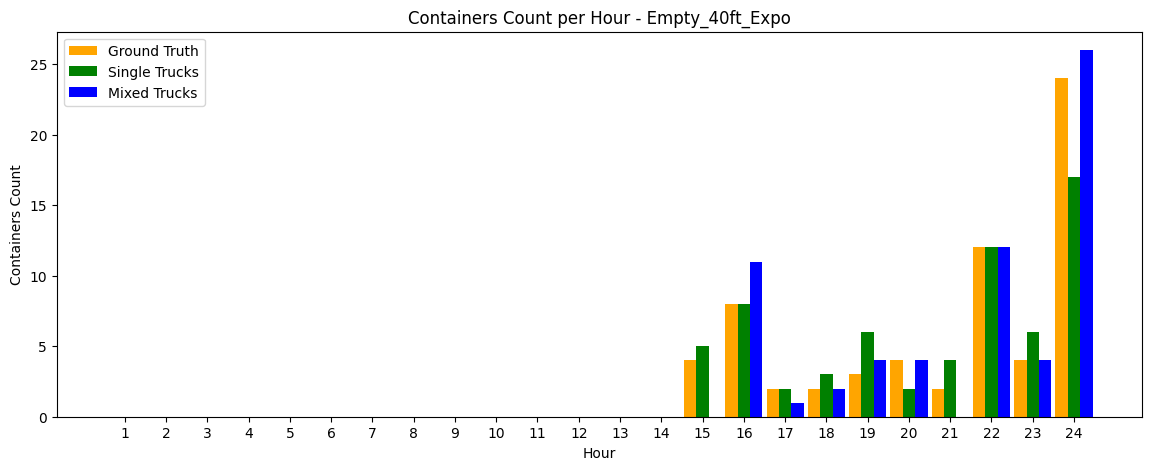

-------------------------------------------
- Pattern: Laden_40ft_Expo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 3.5874, Relative Std: 1.6087%
Mixed Trucks Diff to Ground Truth Std: 4.8626, Relative Std: 2.1805%
Ground Truth Total: 223
Single Trucks Total: 223
Mixed Trucks Total: 221


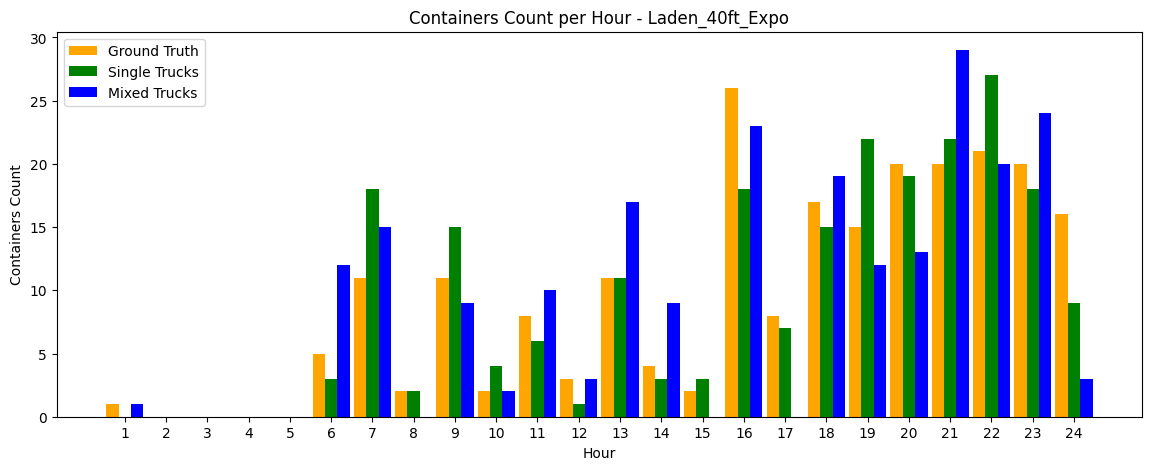

-------------------------------------------
- Pattern: Laden_20ft_Impo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 2.8893, Relative Std: 1.4374%
Mixed Trucks Diff to Ground Truth Std: 3.1181, Relative Std: 1.5513%
Ground Truth Total: 201
Single Trucks Total: 201
Mixed Trucks Total: 210


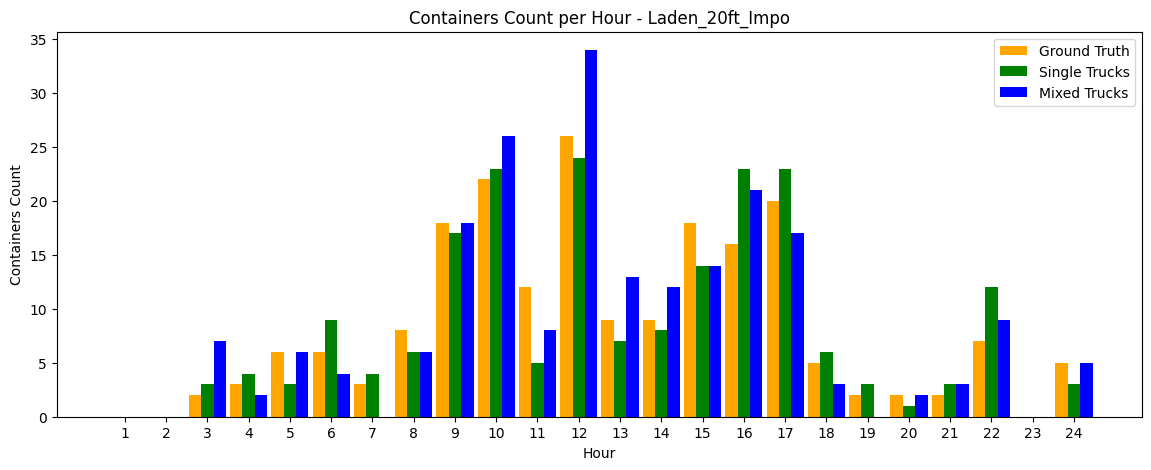

-------------------------------------------
- Pattern: Laden_40ft_Impo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 6.297, Relative Std: 0.877%
Mixed Trucks Diff to Ground Truth Std: 7.0247, Relative Std: 0.9784%
Ground Truth Total: 718
Single Trucks Total: 718
Mixed Trucks Total: 719


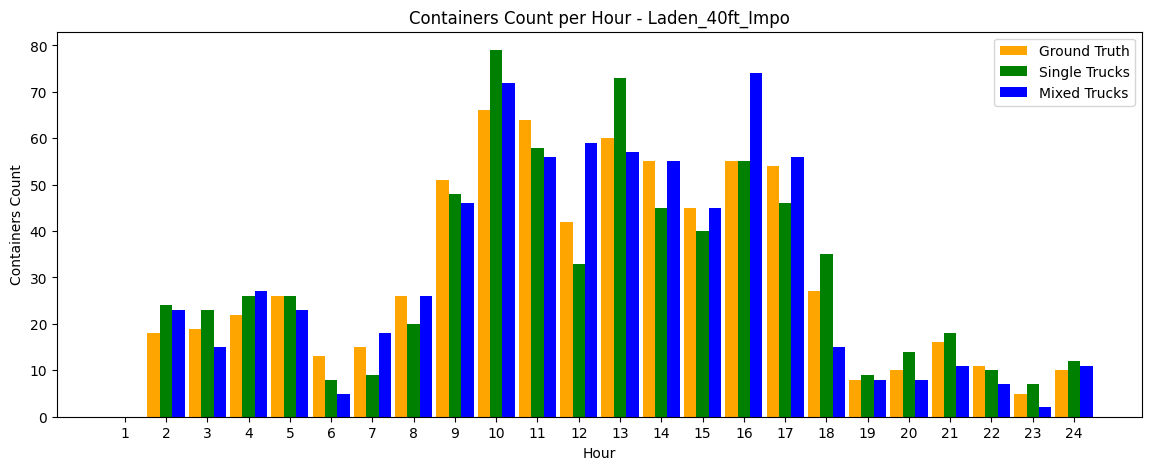

-------------------------------------------
- Pattern: Empty_20ft_Impo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 0.0, Relative Std: 0%
Mixed Trucks Diff to Ground Truth Std: 0.0, Relative Std: 0%
Ground Truth Total: 0
Single Trucks Total: 0
Mixed Trucks Total: 0


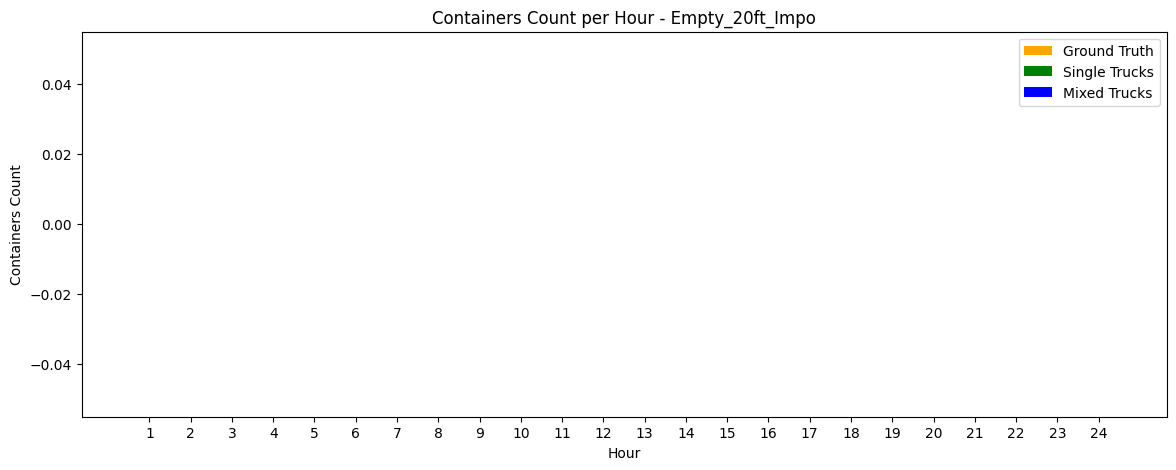

-------------------------------------------
- Pattern: Empty_40ft_Impo
-------------------------------------------
Single Trucks Diff to Ground Truth Std: 0.0, Relative Std: 0%
Mixed Trucks Diff to Ground Truth Std: 0.0, Relative Std: 0%
Ground Truth Total: 0
Single Trucks Total: 0
Mixed Trucks Total: 0


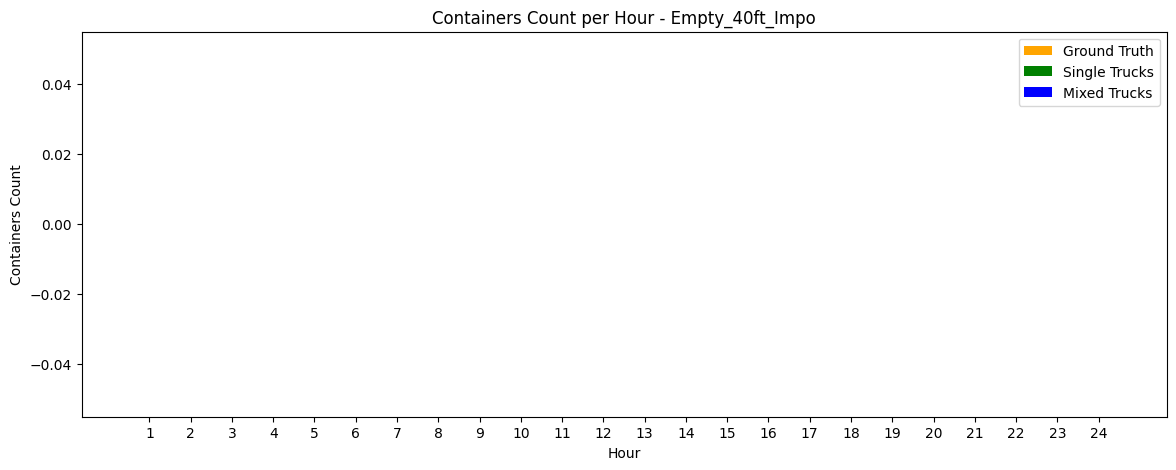

In [10]:
## Analyze Single Trucks Simulations vs Mixed Trucks Simulations on SPF Containers Flow per Hour

datasets = {
    'Ground Truth': pd.read_excel('SPF_Containers_Count_1_R3.xlsx', sheet_name='GroundTruth'),
    'Single Trucks': pd.read_excel('SPF_Containers_Count_1_R3.xlsx', sheet_name='SingleTruck'),
    'Mixed Trucks': pd.read_excel('SPF_Containers_Count_1_R3.xlsx', sheet_name='SingleDoubleCombination'),
}

# datasets['Mixed Trucks']

patterns = datasets['Ground Truth'].columns.to_list()
# patterns.remove('Day')
# patterns.remove('Hour')
patterns = ['Empty_20ft_DSCH', 'Laden_20ft_DSCH', 'Empty_40ft_DSCH', 'Laden_40ft_DSCH', 'Laden_20ft_Load', 'Laden_40ft_Load', 'Empty_20ft_Load', 'Empty_40ft_Load']
patterns_displays = [p.replace('DSCH', 'Expo').replace('Load', 'Impo') for p in patterns]

for pattern, pattern_display in zip(patterns, patterns_displays):
    print(f'-------------------------------------------')
    print(f'- Pattern: {pattern_display}')
    print(f'-------------------------------------------')

    total_conts_gt = datasets['Ground Truth'][pattern].sum()
    total_conts_singles = datasets['Single Trucks'][pattern].sum()
    total_conts_mixed = datasets['Mixed Trucks'][pattern].sum()

    singles_std = (datasets['Ground Truth'][pattern] - datasets['Single Trucks'][pattern]).std()
    mixed_std = (datasets['Ground Truth'][pattern] - datasets['Mixed Trucks'][pattern]).std()

    single_std_percent = singles_std / total_conts_gt * 100 if total_conts_gt > 0 else 0
    mixed_std_percent = mixed_std / total_conts_gt * 100 if total_conts_gt > 0 else 0

    print(f'Single Trucks Diff to Ground Truth Std: {round(singles_std, 4)}, Relative Std: {round(single_std_percent, 4)}%')
    print(f'Mixed Trucks Diff to Ground Truth Std: {round(mixed_std, 4)}, Relative Std: {round(mixed_std_percent, 4)}%')

    print(f'Ground Truth Total: {total_conts_gt}')
    print(f'Single Trucks Total: {total_conts_singles}')
    print(f'Mixed Trucks Total: {total_conts_mixed}')

    # Plot a single bar chart with the 3 datasets. Each dataset will have a x offset of 0.3 and width 0.3, starting from x - 0.6

    plt.figure(figsize=(14, 5))

    for dataset_name, df in datasets.items():
        
        subplot_ind = 0 if dataset_name == 'Ground Truth' else 1 if dataset_name == 'Single Trucks' else 2
        subplot_colors = ['orange', 'green', 'blue']

        x = range(1, 25)

        # plot bar chart with offset depending on subplot_ind as x - 0.6 + subplot_ind * 0.3
        plt.bar([i - 0.3 + subplot_ind * 0.3 for i in x], df[pattern], width=0.3, color=subplot_colors[subplot_ind], label=dataset_name)

        plt.xticks(x)
        plt.xlabel('Hour')
        plt.ylabel('Containers Count')
        plt.title(f'Containers Count per Hour - {pattern_display}')

        plt.legend()

    plt.show()



In [48]:
from typing import NamedTuple

class DoubleSingleTrucksCounter:
    class ContainerOperation(NamedTuple):
        operation_date: dt.datetime
        truck_plate: str

    class CountingResult(NamedTuple):
        double_trucks: int
        single_trucks: int
        double_percentage: float
        single_percentage: float

    DEFAULT_MAX_SAME_INTEROP_TIME = dt.timedelta(minutes=30)

    def __init__(self, max_same_interop_time: dt.timedelta = DEFAULT_MAX_SAME_INTEROP_TIME) -> None:
        self.max_same_interop_time = max_same_interop_time

    def count(self, operations: list[ContainerOperation]) -> CountingResult:
        """
        Counts the number of double and single trucks in the operations list and their percentages
        """
        plates_last_seen: dict[str, dt.datetime] = {}


        double_trucks_count = 0
        single_trucks_count = 0

        if len(operations) == 0:
            return DoubleSingleTrucksCounter.CountingResult(0, 0, 0, 0)

        for op in operations:
            plate = op.truck_plate
            time = op.operation_date
            if plate in plates_last_seen:
                last_seen = plates_last_seen[plate]
                if time - last_seen <= self.max_same_interop_time:
                    plates_last_seen.pop(plate)
                    double_trucks_count += 1
                    single_trucks_count -= 1
                else:
                    single_trucks_count += 1
                    plates_last_seen[plate] = time
            else:
                single_trucks_count += 1
                plates_last_seen[plate] = time
            

        return DoubleSingleTrucksCounter.CountingResult(
            double_trucks=double_trucks_count,
            single_trucks=single_trucks_count,
            double_percentage=double_trucks_count / (double_trucks_count + single_trucks_count),
            single_percentage=single_trucks_count / (double_trucks_count + single_trucks_count)
        )

In [39]:
day_df = eit_spf_df[eit_spf_df['OPERATION_DATE'].dt.day == 23]
day_df

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
5782,CMAU9395647,I,40,F,CNTR,2023-08-23 05:08:12-07:00,69FA2A,1A,DR31,TRA
5783,TGBU6027323,I,40,F,CNTR,2023-08-23 05:08:12-07:00,69FA2A,1C,HYUN,LIN
5784,CAIU4792870,I,40,F,CNTR,2023-08-23 05:08:16-07:00,59FA2A,1A,DR31,TRA
5785,WHSU6819804,I,40,F,CNTR,2023-08-23 05:08:16-07:00,59FA2A,1A,DR31,TRA
5786,WHLU4291800,O,40,F,CNTR,2023-08-23 05:08:18-07:00,AX9074A,2C,TR12,TRA
...,...,...,...,...,...,...,...,...,...,...
6375,CSNU7372925,I,40,F,CNTR,2023-08-23 22:08:50-07:00,17AE2W,1A,TRS7,TRA
6376,TGBU4778048,I,40,F,CNTR,2023-08-23 22:08:50-07:00,17AE2W,1A,TRS7,TRA
6377,DFSU1239550,I,20,F,CNTR,2023-08-23 22:08:51-07:00,965DU3,1A,DR22,TRA
6378,SEGU1135416,I,20,F,CNTR,2023-08-23 22:08:51-07:00,965DU3,1A,DR22,TRA


In [49]:
#iterate df rows
moves = []
for index, row in day_df.iterrows():
    moves.append(DoubleSingleTrucksCounter.ContainerOperation(operation_date=row['OPERATION_DATE'], truck_plate=row['PLATE']))

counter = DoubleSingleTrucksCounter()
results = counter.count(moves)
print(results)

CountingResult(double_trucks=168, single_trucks=262, double_percentage=0.39069767441860465, single_percentage=0.6093023255813953)


In [99]:

eit_wes_df = pd.read_excel('Q_WESTERN_AUG_EIT_2.xlsx', sheet_name='Sheet1')
eit_wes_df['OPERATION_DATE'] = pd.to_datetime(eit_wes_df['OPERATION_DATE'])
eit_spf_df

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
0,FFAU3935495,I,40,F,CNTR,2023-08-10 22:08:44-07:00,34AV3A,1C,RS07,LIN
1,FFAU1474959,I,40,F,CNTR,2023-08-10 23:08:04-07:00,26AA6R,1A,TR13,TRA
2,FFAU2482183,I,40,F,CNTR,2023-08-10 23:08:05-07:00,509EZ1,1C,RS07,LIN
3,FFAU3482887,I,40,F,CNTR,2023-08-10 23:08:07-07:00,893AJ4,1A,TR13,TRA
4,TGBU9302270,I,40,F,CNTR,2023-08-10 23:08:10-07:00,102EY3,1C,RS07,LIN
...,...,...,...,...,...,...,...,...,...,...
10093,TRHU7787983,I,40,F,CNTR,2023-08-31 22:08:42-07:00,44AL9S,1C,RS06,LIN
10094,WHSU5203305,I,40,F,CNTR,2023-08-31 22:08:43-07:00,35AE1E,1A,TRS7,TRA
10095,TRHU4345627,I,40,F,CNTR,2023-08-31 22:08:47-07:00,78BA3R,1C,RS07,LIN
10096,FFAU3881465,I,40,F,CNTR,2023-08-31 22:08:55-07:00,67AK7X,1C,RS06,LIN


In [100]:
day_wes_df = eit_wes_df[eit_wes_df['OPERATION_DATE'].dt.day == 23]
day_wes_df

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
3802,FCIU6549488,I,20,E,EMDP,2023-08-23 00:08:01-07:00,AN5662A,1P,K05,LIN
3803,FCIU6645563,I,20,E,EMDP,2023-08-23 00:08:01-07:00,AN5662A,1P,K05,LIN
3804,WHLU0339715,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
3805,WHLU0531667,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
3806,WHSU2385021,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
...,...,...,...,...,...,...,...,...,...,...
4049,WHLU5838321,I,40,E,EMDP,2023-08-23 23:08:55-07:00,AG3571A,4P,K05,LIN
4050,WHSU5045473,I,40,E,EMDP,2023-08-23 23:08:55-07:00,669DU4,4P,K05,LIN
4051,WHSU5744146,I,40,E,EMDP,2023-08-23 23:08:55-07:00,669DU4,4P,K05,LIN
4052,CMAU4637619,I,40,E,EMDP,2023-08-23 23:08:57-07:00,AV6891A,1P,EH06,LIN


In [28]:
day_wes_df[day_wes_df['PLATE'] == 'AL8423A']

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
3804,WHLU0339715,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
3805,WHLU0531667,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
3806,WHSU2385021,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
3807,WHSU2803590,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN
3888,DFSU3057913,I,20,E,EMDP,2023-08-23 14:08:39-07:00,AL8423A,1P,K05,LIN
3889,WHLU0603900,I,20,E,EMDP,2023-08-23 14:08:39-07:00,AL8423A,1P,K05,LIN
3890,WHLU0647359,I,20,E,EMDP,2023-08-23 14:08:39-07:00,AL8423A,1P,K05,LIN
3891,WHSU2047282,I,20,E,EMDP,2023-08-23 14:08:39-07:00,AL8423A,1P,K05,LIN
3982,TEMU6922597,I,40,E,EMDP,2023-08-23 20:08:43-07:00,AL8423A,1P,EH06,LIN
3983,TGCU0108695,I,40,E,EMDP,2023-08-23 20:08:43-07:00,AL8423A,1P,EH06,LIN


In [50]:
#iterate df rows
moves = []
for index, row in day_wes_df.iterrows():
    moves.append(DoubleSingleTrucksCounter.ContainerOperation(operation_date=row['OPERATION_DATE'], truck_plate=row['PLATE']))

counter = DoubleSingleTrucksCounter()
results = counter.count(moves)
print(results)

CountingResult(double_trucks=126, single_trucks=0, double_percentage=1.0, single_percentage=0.0)


In [51]:
day_wes_df['PLATE'].unique()

array(['AN5662A', 'AL8423A', 'AT8979A', '84AE9V', '29AW7Z', '75AS2R',
       '857AJ4', '421GK9', 'AL8965A', '408BX2', '660DU3', 'AN64877',
       'AL4194A', 'AM3796A', 'AH3134A', '48AL5L', '549DU5', '451GK9',
       '283BX2', '02AN8G', 'AN4054A', 'AL8378A', '79AK7X', '666DU3',
       'AN8196A', '159EY3', 'AN91980', 'AG3571A', '480BX3', '888DU3',
       '21AK6X', 'AV6891A', '454DU4', '63AE4S', '33AP4T', '326DU3',
       '669DU4'], dtype=object)

In [56]:
day_wes_df[day_wes_df['PLATE'] == '660DU3']

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
3838,DFSU3009345,I,20,E,EMDP,2023-08-23 12:08:49-07:00,660DU3,1P,K05,LIN
3839,DFSU3017865,I,20,E,EMDP,2023-08-23 12:08:49-07:00,660DU3,1P,K05,LIN
3840,TGCU0124485,I,20,E,EMDP,2023-08-23 12:08:49-07:00,660DU3,1P,K05,LIN
3841,WHLU0571124,I,20,E,EMDP,2023-08-23 12:08:49-07:00,660DU3,1P,K05,LIN
3956,TCKU6480150,I,40,E,EMDP,2023-08-23 19:08:23-07:00,660DU3,1P,EH06,LIN
3957,WHLU5693995,I,40,E,EMDP,2023-08-23 19:08:23-07:00,660DU3,1P,EH06,LIN


In [57]:
import math
last_seen: dict[str, dt.datetime] = {}
deltas: list[dt.timedelta] = []


for index, row in day_wes_df.iterrows():
    plate = row['PLATE']
    time = row['OPERATION_DATE']
    if plate in last_seen:
        last_seen_time = last_seen[plate]
        deltas.append(time - last_seen_time)
    else:
        deltas.append(None)
    last_seen[plate] = time

# put deltas as new column PLATE_TIME_DELTA
day_wes_df['PLATE_TIME_DELTA'] = pd.Series(deltas, index=day_wes_df.index)
day_wes_df

/tmp/ipykernel_1842/2244269168.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_wes_df['PLATE_TIME_DELTA'] = pd.Series(deltas, index=day_wes_df.index)


,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE,PLATE_TIME_DELTA
3802,FCIU6549488,I,20,E,EMDP,2023-08-23 00:08:01-07:00,AN5662A,1P,K05,LIN,NaT
3803,FCIU6645563,I,20,E,EMDP,2023-08-23 00:08:01-07:00,AN5662A,1P,K05,LIN,0 days 00:00:00
3804,WHLU0339715,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN,NaT
3805,WHLU0531667,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN,0 days 00:00:00
3806,WHSU2385021,I,20,E,EMDP,2023-08-23 11:08:07-07:00,AL8423A,1P,K05,LIN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4049,WHLU5838321,I,40,E,EMDP,2023-08-23 23:08:55-07:00,AG3571A,4P,K05,LIN,0 days 00:00:00
4050,WHSU5045473,I,40,E,EMDP,2023-08-23 23:08:55-07:00,669DU4,4P,K05,LIN,NaT
4051,WHSU5744146,I,40,E,EMDP,2023-08-23 23:08:55-07:00,669DU4,4P,K05,LIN,0 days 00:00:00
4052,CMAU4637619,I,40,E,EMDP,2023-08-23 23:08:57-07:00,AV6891A,1P,EH06,LIN,0 days 01:00:13


<Axes: >

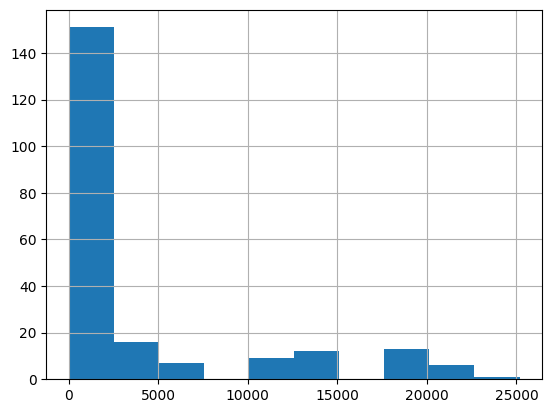

In [62]:
# filter out None values
day_wes_df = day_wes_df[day_wes_df['PLATE_TIME_DELTA'].notna()]

# PLATE_TIME_DELTA is a timedelta object, convert it to seconds
day_wes_df['PLATE_TIME_DELTA'] = day_wes_df['PLATE_TIME_DELTA'].apply(lambda x: x.total_seconds())

day_wes_df['PLATE_TIME_DELTA'].hist()

<Axes: >

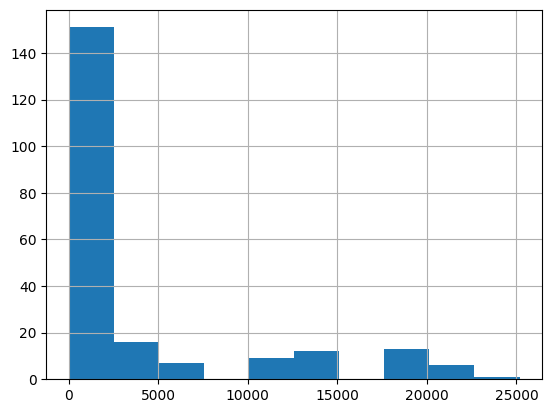

In [68]:

day_wes_df['PLATE_TIME_DELTA'].hist()

<Axes: >

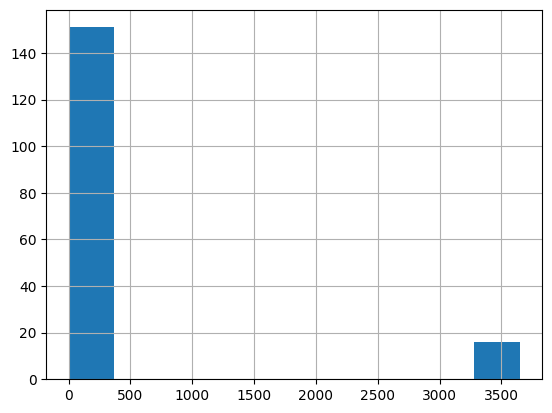

In [75]:
zoom_df = day_wes_df[day_wes_df['PLATE_TIME_DELTA'] < 4000]
zoom_df['PLATE_TIME_DELTA'].hist()

In [81]:
last_seen: dict[str, dt.datetime] = {}
deltas: list[dt.timedelta] = []


for index, row in day_df.iterrows():
    plate = row['PLATE']
    time = row['OPERATION_DATE']
    if plate in last_seen:
        last_seen_time = last_seen[plate]
        deltas.append(time - last_seen_time)
    else:
        deltas.append(None)
    last_seen[plate] = time

# put deltas as new column PLATE_TIME_DELTA
day_df['PLATE_TIME_DELTA'] = pd.Series(deltas, index=day_df.index)
# convert to seconds
day_df['PLATE_TIME_DELTA'] = day_df['PLATE_TIME_DELTA'].apply(lambda x: x.total_seconds())
day_df

/tmp/ipykernel_1842/1849770921.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['PLATE_TIME_DELTA'] = pd.Series(deltas, index=day_df.index)
/tmp/ipykernel_1842/1849770921.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['PLATE_TIME_DELTA'] = day_df['PLATE_TIME_DELTA'].apply(lambda x: x.total_seconds())


,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE,PLATE_TIME_DELTA
5783,TGBU6027323,I,40,F,CNTR,2023-08-23 05:08:12-07:00,69FA2A,1C,HYUN,LIN,NaN
5785,WHSU6819804,I,40,F,CNTR,2023-08-23 05:08:16-07:00,59FA2A,1A,DR31,TRA,NaN
5790,UETU5947684,I,40,F,CNTR,2023-08-23 05:08:25-07:00,20AG3S,1A,DR31,TRA,NaN
5795,TEMU8347774,I,40,F,CNTR,2023-08-23 05:08:38-07:00,63AA2G,1C,HYUN,LIN,NaN
5800,WHSU6678687,I,40,F,CNTR,2023-08-23 05:08:54-07:00,412BX4,1A,DR31,TRA,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6374,CMAU7719161,I,40,F,CNTR,2023-08-23 22:08:50-07:00,519DU4,1A,TRS7,TRA,NaN
6376,TGBU4778048,I,40,F,CNTR,2023-08-23 22:08:50-07:00,17AE2W,1A,TRS7,TRA,NaN
6377,DFSU1239550,I,20,F,CNTR,2023-08-23 22:08:51-07:00,965DU3,1A,DR22,TRA,7211.0
6378,SEGU1135416,I,20,F,CNTR,2023-08-23 22:08:51-07:00,965DU3,1A,DR22,TRA,0.0


In [84]:
# count nan
day_df['PLATE_TIME_DELTA'].isna().sum()

196

<Axes: >

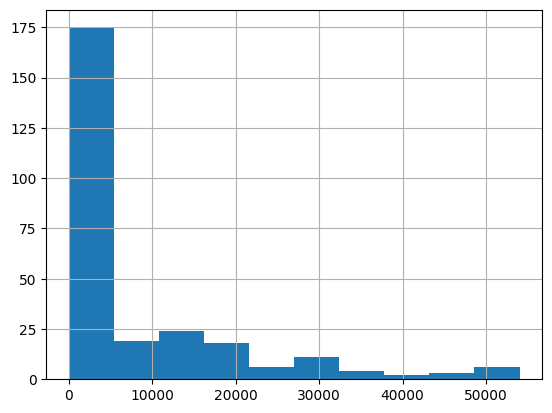

In [78]:
# filter out None values
day_df = day_df[day_df['PLATE_TIME_DELTA'].notna()]
day_df['PLATE_TIME_DELTA'].hist()

<Axes: >

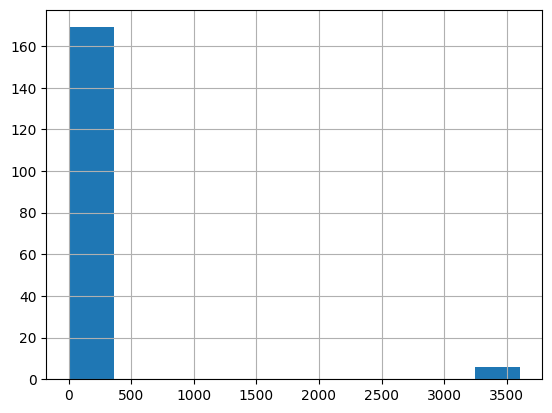

In [79]:
zoom_df = day_df[day_df['PLATE_TIME_DELTA'] < 4000]
zoom_df['PLATE_TIME_DELTA'].hist()

In [101]:

service_count: dict[dt.datetime, int] = {}


for index, row in day_wes_df.iterrows():
    plate = row['PLATE']
    time = row['OPERATION_DATE']

    # key of plate and time
    key = (plate, time)
    
    service_count[key] = service_count.get(key, 0) + 1

counts = list(service_count.values())

service_count

{('AN5662A', Timestamp('2023-08-23 00:08:01-0700', tz='UTC-07:00')): 2,
 ('AL8423A', Timestamp('2023-08-23 11:08:07-0700', tz='UTC-07:00')): 4,
 ('AT8979A', Timestamp('2023-08-23 11:08:28-0700', tz='UTC-07:00')): 4,
 ('84AE9V', Timestamp('2023-08-23 12:08:19-0700', tz='UTC-07:00')): 4,
 ('29AW7Z', Timestamp('2023-08-23 12:08:27-0700', tz='UTC-07:00')): 4,
 ('75AS2R', Timestamp('2023-08-23 12:08:31-0700', tz='UTC-07:00')): 2,
 ('857AJ4', Timestamp('2023-08-23 12:08:47-0700', tz='UTC-07:00')): 4,
 ('421GK9', Timestamp('2023-08-23 12:08:47-0700', tz='UTC-07:00')): 4,
 ('AL8965A', Timestamp('2023-08-23 12:08:47-0700', tz='UTC-07:00')): 4,
 ('408BX2', Timestamp('2023-08-23 12:08:48-0700', tz='UTC-07:00')): 4,
 ('660DU3', Timestamp('2023-08-23 12:08:49-0700', tz='UTC-07:00')): 4,
 ('AN64877', Timestamp('2023-08-23 13:08:07-0700', tz='UTC-07:00')): 2,
 ('AL4194A', Timestamp('2023-08-23 13:08:08-0700', tz='UTC-07:00')): 4,
 ('AT8979A', Timestamp('2023-08-23 13:08:12-0700', tz='UTC-07:00')): 4,

In [102]:
day_wes_df[day_wes_df['PLATE'] == 'AN5662A']

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
3802,FCIU6549488,I,20,E,EMDP,2023-08-23 00:08:01-07:00,AN5662A,1P,K05,LIN
3803,FCIU6645563,I,20,E,EMDP,2023-08-23 00:08:01-07:00,AN5662A,1P,K05,LIN


In [103]:
freq_table: dict[int, int] = {}
for count in counts:
    freq_table[count] = freq_table.get(count, 0) + 1

freq_table

{2: 76, 4: 25}

<BarContainer object of 2 artists>

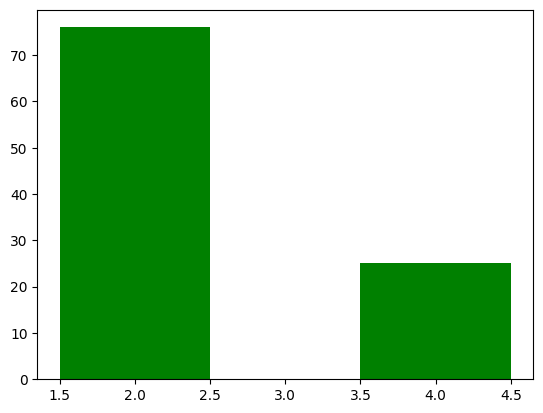

In [104]:

# plot historgram of counts
plt.bar(list(freq_table.keys()), freq_table.values(), width=1, color='g')

In [129]:
#day_wes_df.OPERATION_DATE.dt.date

# get the month day of the date
for day in eit_wes_df.OPERATION_DATE.dt.strftime('%d').unique():
    day_df = eit_wes_df[eit_wes_df.OPERATION_DATE.dt.strftime('%d') == day]
    print(f'Day {day}, # Conts: {len(day_df)}')

    service_count: dict[dt.datetime, int] = {}
    for index, row in day_df.iterrows():
        plate = row['PLATE']
        time = row['OPERATION_DATE']
        key = (plate, time)
        service_count[key] = service_count.get(key, 0) + 1
    counts = list(service_count.values())

    freq_table: dict[int, int] = {}
    for count in counts:
        freq_table[count] = freq_table.get(count, 0) + 1

    if 1 in freq_table:
        print(freq_table[1])
        for index, value in service_count.items():
            if value == 1:
                print(index)

    print(freq_table)
        
    


# get the month day of the date

Day 10, # Conts: 36
{2: 10, 4: 4}
Day 11, # Conts: 350
2
('32AP6A', Timestamp('2023-08-11 16:08:06-0700', tz='UTC-07:00'))
('32AP6A', Timestamp('2023-08-11 17:08:57-0700', tz='UTC-07:00'))
{2: 157, 4: 7, 3: 2, 1: 2}
Day 12, # Conts: 573
1
('AH3134A', Timestamp('2023-08-12 18:08:09-0700', tz='UTC-07:00'))
{2: 200, 4: 43, 1: 1}
Day 13, # Conts: 429
1
('AM7822A', Timestamp('2023-08-13 13:08:42-0700', tz='UTC-07:00'))
{4: 29, 2: 156, 1: 1}
Day 14, # Conts: 305
1
('AN8196A', Timestamp('2023-08-14 22:08:08-0700', tz='UTC-07:00'))
{2: 80, 4: 36, 1: 1}
Day 15, # Conts: 269
1
('AV6891A', Timestamp('2023-08-15 19:08:02-0700', tz='UTC-07:00'))
{2: 115, 4: 8, 1: 1, 3: 2}
Day 16, # Conts: 125
{2: 49, 4: 6, 3: 1}
Day 17, # Conts: 386
2
('65AY6N', Timestamp('2023-08-17 13:08:14-0700', tz='UTC-07:00'))
('32AP6A', Timestamp('2023-08-17 15:08:45-0700', tz='UTC-07:00'))
{2: 192, 1: 2}
Day 18, # Conts: 86
{2: 17, 4: 13}
Day 19, # Conts: 428
{2: 160, 4: 27}
Day 20, # Conts: 28
{2: 14}
Day 21, # Conts: 270


In [130]:
eit_wes_df[(eit_wes_df['PLATE'] == '32AP6A') & (eit_wes_df['OPERATION_DATE'].dt.strftime('%d') == '11')]

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,TYPE_CNTR,OPERATION_DATE,PLATE,BLOCK,YARD_EQUIP,YARD_EQUIP_TYPE
297,HLXU3358324,I,20,E,EMDP,2023-08-11 16:08:06-07:00,32AP6A,4P,K05,LIN
317,HLXU3293521,I,20,E,EMDP,2023-08-11 17:08:57-07:00,32AP6A,4P,K05,LIN


In [26]:
def get_plate_time_delta(df: pd.DataFrame) -> list[dt.timedelta]:
    last_seen: dict[str, dt.datetime] = {}
    deltas: list[dt.timedelta] = []

    for _, row in df.iterrows():
        plate = row['PLATE']
        time = row['OPERATION_DATE']
        if plate in last_seen:
            deltas.append(time - last_seen[plate])
        else:
            deltas.append(None)
        last_seen[plate] = time

    return deltas

In [25]:
icave_spf = pd.read_excel('Q_SPF_AUG_AUG_2023_ICAVE.xlsx', sheet_name='Sheet 1')
icave_spf.sort_values(by=['OPERATION_DATE'], inplace=True)
icave_spf

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,OPERATION_DATE,PLATE,BLOCK
15890,MRKU3939085,O,40,F,2023-08-01 00:02:42,69BA6D,5D
15891,FFAU1374667,O,40,F,2023-08-01 00:02:42,69BA6D,5D
0,FANU1258125,I,40,F,2023-08-01 00:06:05,919AN5,1D
15892,MSCU7038370,O,40,F,2023-08-01 00:13:45,SP,5D
15893,MRSU5547147,O,40,F,2023-08-01 00:26:41,SP,5D
...,...,...,...,...,...,...,...
15885,KKFU8124198,I,40,F,2023-08-31 23:50:00,735AR2,3E
15886,ZCSU7455845,I,40,F,2023-08-31 23:53:42,71AX5A,5E
15887,ZCSU7643565,I,40,F,2023-08-31 23:56:26,252ET3,2E
15888,ZCSU7533090,I,40,F,2023-08-31 23:56:26,252ET3,2E


In [131]:
# of df where PLATE != 'SP', '.' or '0.'
deltas = get_plate_time_delta(icave_spf[icave_spf['PLATE'].isin(['SP', '.', '0.']) == False])
num_deltas = [delta.total_seconds() for delta in deltas if delta is not None]

In [123]:
# clone icave spf df
icave_spf_2 = icave_spf.copy()
icave_spf_2['PLATE_TIME_DELTA'] = pd.Series(deltas, index=icave_spf_2.index)
icave_spf_2

,ID_CNTR,FLOW,SIZE_CNTR,STATUS_CNTR,OPERATION_DATE,PLATE,BLOCK,PLATE_TIME_DELTA
15890,MRKU3939085,O,40,F,2023-08-01 00:02:42,69BA6D,5D,NaT
15891,FFAU1374667,O,40,F,2023-08-01 00:02:42,69BA6D,5D,0 days 00:00:00
0,FANU1258125,I,40,F,2023-08-01 00:06:05,919AN5,1D,NaT
15892,MSCU7038370,O,40,F,2023-08-01 00:13:45,SP,5D,NaT
15893,MRSU5547147,O,40,F,2023-08-01 00:26:41,SP,5D,0 days 00:12:56
...,...,...,...,...,...,...,...,...
15885,KKFU8124198,I,40,F,2023-08-31 23:50:00,735AR2,3E,1 days 19:24:08
15886,ZCSU7455845,I,40,F,2023-08-31 23:53:42,71AX5A,5E,9 days 12:48:24
15887,ZCSU7643565,I,40,F,2023-08-31 23:56:26,252ET3,2E,2 days 00:06:38
15888,ZCSU7533090,I,40,F,2023-08-31 23:56:26,252ET3,2E,0 days 00:00:00


In [126]:
icave_spf_2['PLATE_LENGTH'] = icave_spf_2['PLATE'].apply(lambda x: len(x))

PLATE_LENGTH
6     37406
7      1360
5       635
2       101
8        26
9        10
4         5
10        4
1         4
3         3
Name: count, dtype: int64

In [130]:
icave_spf_2[icave_spf_2['PLATE_LENGTH'] <= 2]['PLATE'].unique()

array(['SP', '.', '0.'], dtype=object)

In [29]:
unique_times = list(set(num_deltas))
unique_times.sort()

In [132]:
# form a pandas series of deltas
deltas_series = pd.Series(num_deltas)
deltas_series

0             0.0
1             1.0
2             0.0
3             0.0
4           311.0
           ...   
36116    156248.0
36117    823704.0
36118    173198.0
36119         0.0
36120    386234.0
Length: 36121, dtype: float64

<Axes: >

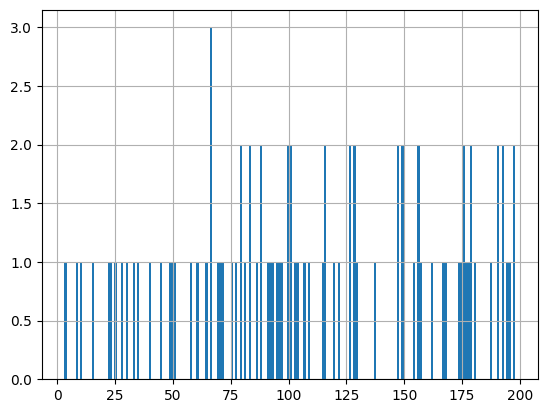

In [136]:
low = 2
up = 200

bins = int((up-low) / (10*((up-low)/100)))
bins = up - low
deltas_series[(low <= deltas_series) & (deltas_series < up)].hist(bins=bins)

(array([49., 45., 25., 25., 26., 22., 11., 15.,  9., 12., 14., 11., 14.,
        15., 17., 10., 10.,  8., 10., 21., 16., 10., 14., 22., 15., 11.,
        18., 20., 21., 13., 25., 17., 20., 28., 21., 32., 18., 33., 19.,
        36., 25., 36., 31., 33., 31., 32., 27., 35., 28., 34., 39., 29.,
        29., 32., 33., 40., 30., 32., 32., 35., 21., 31., 23., 30., 36.,
        28., 49., 45., 20., 27., 35., 42., 33., 35., 35., 30., 32., 39.,
        27., 35., 39., 36., 32., 43., 29., 39., 48., 44., 33., 34., 30.,
        33., 35., 36., 28., 27., 45., 28., 33., 17.]),
 array([   10. ,   109.9,   209.8,   309.7,   409.6,   509.5,   609.4,
          709.3,   809.2,   909.1,  1009. ,  1108.9,  1208.8,  1308.7,
         1408.6,  1508.5,  1608.4,  1708.3,  1808.2,  1908.1,  2008. ,
         2107.9,  2207.8,  2307.7,  2407.6,  2507.5,  2607.4,  2707.3,
         2807.2,  2907.1,  3007. ,  3106.9,  3206.8,  3306.7,  3406.6,
         3506.5,  3606.4,  3706.3,  3806.2,  3906.1,  4006. ,  4105.9,
        

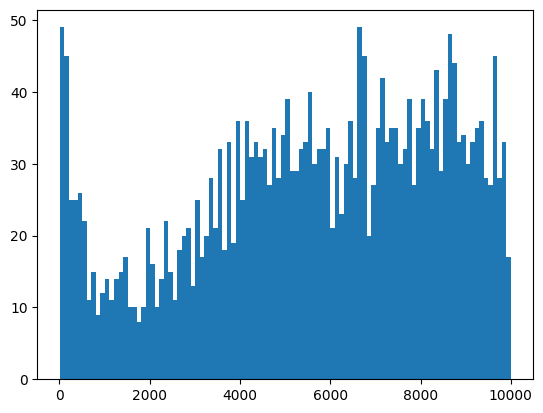

In [48]:
low = 0
up = 1000


plt.hist(deltas, bins=100, range=(10, 10000))

In [139]:

eit_spf_df = pd.read_excel('Q_SPF_AUG_EIT_2.xlsx', sheet_name='Sheet1')
eit_spf_df['OPERATION_DATE'] = pd.to_datetime(eit_spf_df['OPERATION_DATE'])

deltas = get_plate_time_delta(eit_spf_df)
num_deltas = [delta.total_seconds() for delta in deltas if delta is not None]

(array([0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 2.,
        0., 2., 2., 1., 0., 0., 0., 0., 0., 0., 2., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 49 artists>)

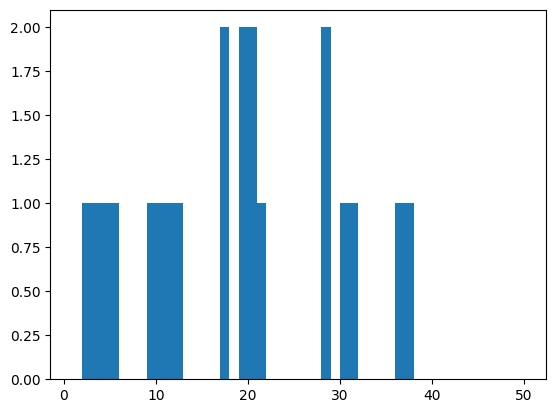

In [142]:
# plot histogram
low = 1
up = 50
bins = up - low
plt.hist(num_deltas, bins=bins, range=(low, up))